# IMPORTS

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # A classe LinearRegression é utilizada para criar modelos de regressão linear.
from sklearn import metrics as mt # contém várias funções para avaliar o desempenho de modelos de machine learnin

# LOAD DATASET

In [4]:
df = pd.read_csv('../datasets/train.csv')

# DATA PREPARATION

In [5]:
# Define uma lista de nomes de características (features) que serão usadas como variáveis independentes no modelo
features = ['idade',
            'divida_atual',
            'renda_anual',
            'valor_em_investimentos',
            'taxa_utilizacao_credito',
            'num_emprestimos',
            'num_contas_bancarias',
            'num_cartoes_credito',
            'dias_atraso_dt_venc',
            'num_pgtos_atrasados',
            'num_consultas_credito',
            'taxa_juros']

# Define uma lista com o nome da variável alvo (label) que será prevista pelo modelo
label = ['saldo_atual']


In [6]:
# Seleciona as colunas especificadas na lista 'features' e as armazena em x_train
x_train = df.loc[:, features]

# Seleciona a coluna especificada na lista 'label' e a armazena em y_train
y_train = df.loc[:, label]

# MODEL TRAINING

### Model training with Statsmodel

In [7]:
# Importa a API de fórmulas do statsmodels para criação e ajuste de modelos estatísticos
import statsmodels.formula.api as smf

# Importa a biblioteca statsmodels e suas funções principais
import statsmodels.api as sm

# Concatena x_train e y_train em um único DataFrame, alinhando as colunas
df3 = pd.concat([x_train, y_train], axis=1)

# Define o modelo de regressão linear usando a fórmula especificada
# 'saldo_atual ~ idade + divida_atual + num_emprestimos' especifica que 'saldo_atual' é a variável dependente
# e 'idade', 'divida_atual', e 'num_emprestimos' são as variáveis independentes
reg2 = smf.ols(formula='saldo_atual ~ idade + divida_atual + num_emprestimos', data=df3)

# Ajusta o modelo aos dados de treinamento
reg2 = reg2.fit()

# Realiza uma análise de variância (ANOVA) para o modelo ajustado
# A ANOVA ajuda a determinar a importância das variáveis independentes no modelo
anova_results2 = sm.stats.anova_lm(reg2, typ=1)


anova_results2 = sm.stats.anova_lm(reg2, typ=1): 

Realiza uma análise de variância para o modelo ajustado (reg2). A ANOVA ajuda a determinar se as variáveis independentes têm um efeito significativo na variável dependente e permite comparar a variabilidade explicada pelo modelo com a variabilidade total dos dados. O parâmetro typ=1 especifica o tipo de ANOVA a ser realizado.

In [8]:
# Imprime os resultados da análise de variância (ANOVA)
print(anova_results2)

# Imprime uma linha de separação decorativa
print(40 * '-=')

# Imprime um título centrado para o resumo do modelo
print(30 * ' ' + 'Summary')

# Imprime outra linha de separação decorativa
print(40 * '-=')

# Imprime o resumo do modelo de regressão linear ajustado
print(reg2.summary())


                     df        sum_sq       mean_sq            F  \
idade               1.0  4.085925e+02  4.085925e+02     0.009575   
divida_atual        1.0  4.494005e+07  4.494005e+07  1053.104993   
num_emprestimos     1.0  3.976109e+03  3.976109e+03     0.093174   
Residual         9496.0  4.052309e+08  4.267385e+04          NaN   

                        PR(>F)  
idade             9.220529e-01  
divida_atual     3.537135e-219  
num_emprestimos   7.601864e-01  
Residual                   NaN  
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                              Summary
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                            OLS Regression Results                            
Dep. Variable:            saldo_atual   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:     

### Model Training with sklearn

In [9]:
# Cria uma instância do modelo de regressão linear
lr_model = LinearRegression()

# Ajusta o modelo aos dados de treinamento (x_train e y_train)
lr_model.fit(x_train, y_train)

# Faz previsões com base nos dados de treinamento (x_train)
y_pred = lr_model.predict(x_train)



In [13]:
# Seleciona as colunas 'id_cliente' e 'saldo_atual' do DataFrame original e armazena em df1
df1 = df.loc[:, ['id_cliente', 'saldo_atual']]

# Adiciona uma nova coluna 'predicted' ao DataFrame df1 com as previsões feitas pelo modelo
df1['predicted'] = y_pred

# Exibe as primeiras linhas do DataFrame df1 para uma visualização inicial
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_cliente   9500 non-null   int64  
 1   saldo_atual  9500 non-null   float64
 2   predicted    9500 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 222.8 KB


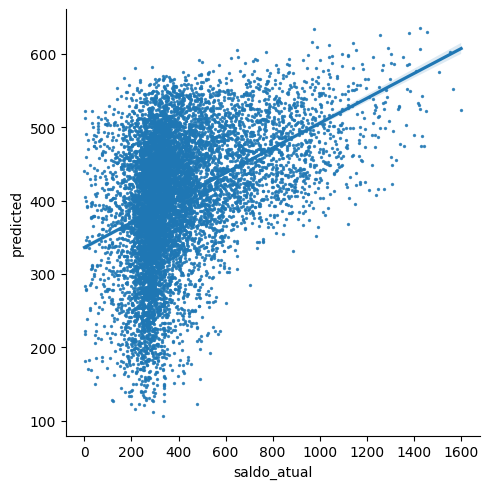

In [12]:
import seaborn as sns
sns.lmplot(df1, x='saldo_atual', y='predicted', scatter_kws={'s': 2})

In [8]:
# Obtém o valor do intercepto (termo constante) do modelo de regressão linear
lr_model.intercept_


array([190.82359144])

lr_model.intercept_:

Este atributo retorna o valor do intercepto do modelo de regressão linear. O intercepto é o valor da variável dependente (saldo_atual, neste caso) quando todas as variáveis independentes são zero. É um dos parâmetros aprendidos pelo modelo durante o ajuste.

In [9]:
# Obtém os coeficientes das variáveis independentes do modelo de regressão linear
lr_model.coef_


array([[ 3.96706202e-04, -4.00595601e-02,  2.77622532e-06,
        -1.04318668e-03,  9.80890872e+00, -1.22353405e-02,
        -6.33015538e-03, -3.57808095e-03, -2.15858165e+00,
         3.77570060e-04,  6.79176336e-03,  3.48471845e-03]])

lr_model.coef_:

Este atributo retorna os coeficientes das variáveis independentes no modelo de regressão linear. Cada coeficiente representa a magnitude e a direção do efeito de uma variável independente na variável dependente. Em outras palavras, os coeficientes indicam como a mudança em cada variável independente afeta a variável dependente.

In [10]:
# Itera sobre o índice das amostras no conjunto de dados de treinamento
for i in range(len(x_train)):

    # Calcula a previsão do modelo para a amostra i, usando a fórmula y = a + bx
    # np.sum((x_train.loc[i,].values * lr_model.coef_)) calcula o termo bx
    # lr_model.intercept_ adiciona o termo constante a
    print(np.sum((x_train.loc[i,].values * lr_model.coef_)) + lr_model.intercept_)

    # Interrompe o loop após a 6ª iteração
    if i == 5:
        break


[346.66954862]
[367.84027655]
[431.46897895]
[445.50646329]
[378.27116865]
[352.4833463]


In [11]:
# Calcula o erro de previsão para cada linha do DataFrame df1
# x['saldo_atual'] é o valor real e x['predicted'] é o valor previsto
# O erro é a diferença entre o valor real e o valor previsto
df1['error'] = df1.apply(lambda x: x['saldo_atual'] - x['predicted'], axis=1)

In [12]:
df1.head()

,id_cliente,saldo_atual,predicted,error
0,1767,278.172008,346.669549,-68.497541
1,11920,268.874152,367.840277,-98.966124
2,8910,446.643127,431.468979,15.174148
3,4964,321.141267,445.506463,-124.365197
4,10100,428.716114,378.271169,50.444945


# Performance

In [13]:
# Calcula o coeficiente de determinação R² para avaliar o desempenho do modelo
# R² mede a proporção da variabilidade na variável dependente que é explicada pelo modelo
mt.r2_score(y_train, y_pred)

0.16917364489050013

mt.r2_score(y_train, y_pred):

O método r2_score da sub-biblioteca metrics da sklearn calcula o coeficiente de determinação R².O valor de R² indica a proporção da variabilidade na variável dependente (y_train) que é explicada pelas previsões (y_pred) do modelo. Um valor de R² próximo de 1 sugere que o modelo explica bem a variabilidade dos dados, enquanto um valor próximo de 0 indica que o modelo não explica bem a variabilidade.

In [14]:
# Calcula o erro quadrático médio (MSE) das previsões
# mean_squared_error é usado para calcular o MSE entre os valores reais (y_train) e as previsões (y_pred)
# np.round arredonda o MSE para duas casas decimais
mse = np.round(mt.mean_squared_error(y_train, y_pred), 2)

# Exibe o erro médio das previsões, formatado como moeda
print(f'A cada previsão, o erro médio é de: U${mse}')


A cada previsão, o erro médio é de: U$39370.27


mean_squared_error:

 calcula o erro quadrático médio (MSE), que é uma medida da média dos quadrados dos erros entre os valores reais (y_train) e as previsões (y_pred). O MSE dá uma ideia de quão longe, em média, as previsões estão dos valores reais. np.round é usado para arredondar o MSE para duas casas decimais para uma apresentação mais limpa.

In [15]:
# Calcula a raiz do erro quadrático médio (RMSE) a partir do MSE
# np.sqrt calcula a raiz quadrada do MSE
rmse = np.sqrt(mse)

# Exibe o valor da raiz do erro quadrático médio (RMSE)
rmse


np.float64(198.41942949217446)